<a href="https://colab.research.google.com/github/brndnsmn/AkademiGrup96/blob/main/Eye_Disease_Classification_ADA447_Midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install fastai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 85.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 56.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 83.5 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [2]:
from google.colab import files
files.upload()  # 👈 kaggle.json dosyasını seçip yükle

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bernadanisman","key":"fce72ad4ea76394c05c0086d1db84560"}'}

In [3]:
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [4]:
!kaggle datasets download -d gunavenkatdoddi/eye-diseases-classification
!unzip eye-diseases-classification.zip

Dataset URL: https://www.kaggle.com/datasets/gunavenkatdoddi/eye-diseases-classification
License(s): ODbL-1.0
100% 733M/736M [00:03<00:00, 152MB/s]
100% 736M/736M [00:03<00:00, 209MB/s]
Archive:  eye-diseases-classification.zip
  inflating: dataset/cataract/0_left.jpg  
  inflating: dataset/cataract/103_left.jpg  
  inflating: dataset/cataract/1062_right.jpg  
  inflating: dataset/cataract/1083_left.jpg  
  inflating: dataset/cataract/1084_right.jpg  
  inflating: dataset/cataract/1102_left.jpg  
  inflating: dataset/cataract/1102_right.jpg  
  inflating: dataset/cataract/1115_left.jpg  
  inflating: dataset/cataract/1126_right.jpg  
  inflating: dataset/cataract/112_right.jpg  
  inflating: dataset/cataract/1144_left.jpg  
  inflating: dataset/cataract/1144_right.jpg  
  inflating: dataset/cataract/1164_left.jpg  
  inflating: dataset/cataract/1167_right.jpg  
  inflating: dataset/cataract/119_left.jpg  
  inflating: dataset/cataract/1285_left.jpg  
  inflating: dataset/cataract/1415_

In [4]:
from fastai.vision.all import *

from pathlib import Path
path = Path("/content/dataset")


In [9]:

files = get_image_files(path)
print(f"Bulunan görsel sayısı: {len(files)}")
print(f"Örnek dosya: {files[0] if files else 'YOK'}")
print(f"Etiketi (klasör adı): {files[0].parent.name if files else 'YOK'}")


Bulunan görsel sayısı: 4217
Örnek dosya: /content/dataset/glaucoma/_179_3204648.jpg
Etiketi (klasör adı): glaucoma


In [10]:
import fastai
import torch
import numpy
import torchvision
print(torch.__version__)
print(fastai.__version__)
print(numpy.__version__)
print(torchvision.__version__)

2.6.0+cu124
2.7.19
2.0.2
0.21.0+cu124


#Create DataBlock and Dataloaders

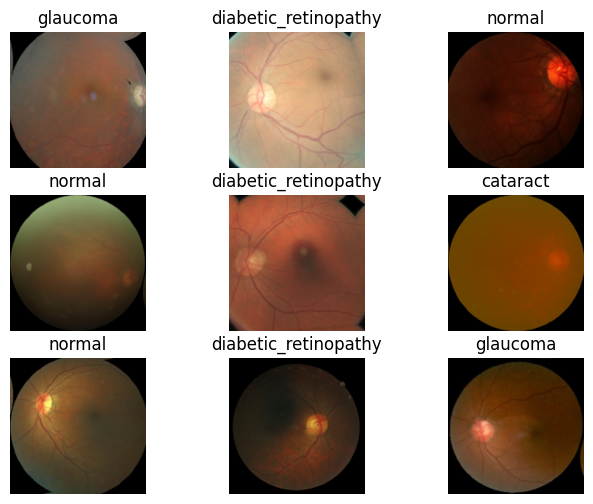

In [7]:
dblock = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    get_y=parent_label,
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224)
)

dls = dblock.dataloaders(path, bs=64)
dls.show_batch(max_n=9, figsize=(8,6))


In [8]:
print(dls.vocab)  # Check the labels;

['cataract', 'diabetic_retinopathy', 'glaucoma', 'normal']


In [10]:
dblock.summary(path)

Setting-up type transforms pipelines
Found 4217 items
2 datasets of sizes 3374,843
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /content/dataset/cataract/_227_9889754.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=256x256
  Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /content/dataset/cataract/_227_9889754.jpg
    applying parent_label gives
      cataract
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(0)

Final sample: (PILImage mode=RGB size=256x256, TensorCategory(0))


Found 4217 items
2 datasets of sizes 3374,843
Setting up Pipeline: PILBase.create
Setting up Pipeline: parent_label -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_item: Pipeline: Resize -

#Train a Simple Model

In [11]:
learn = vision_learner(dls, resnet34, metrics=accuracy)
learn.fine_tune(3)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:02<00:00, 43.3MB/s]


epoch,train_loss,valid_loss,accuracy,time
0,1.146444,0.678713,0.760380,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.630522,0.491777,0.830368,01:00
1,0.443302,0.436305,0.857651,00:56
2,0.339296,0.327369,0.871886,00:56


#Interpret the Model

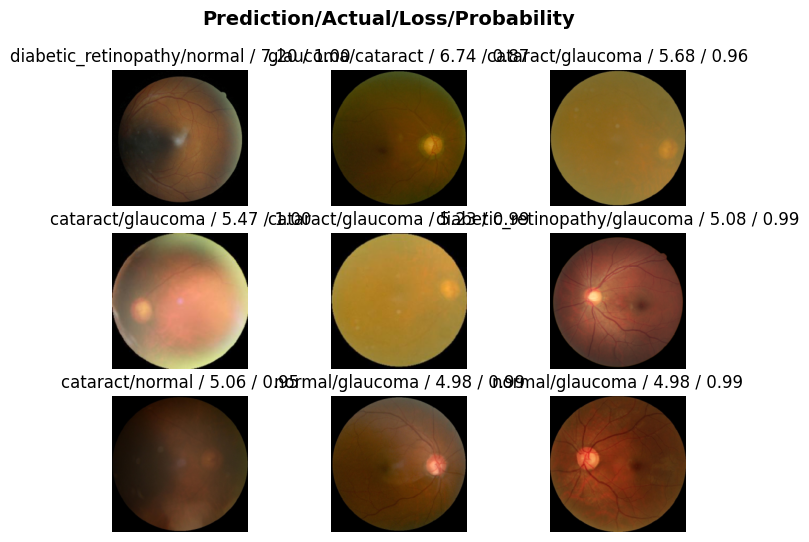

In [12]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_top_losses(9, figsize=(8,6))

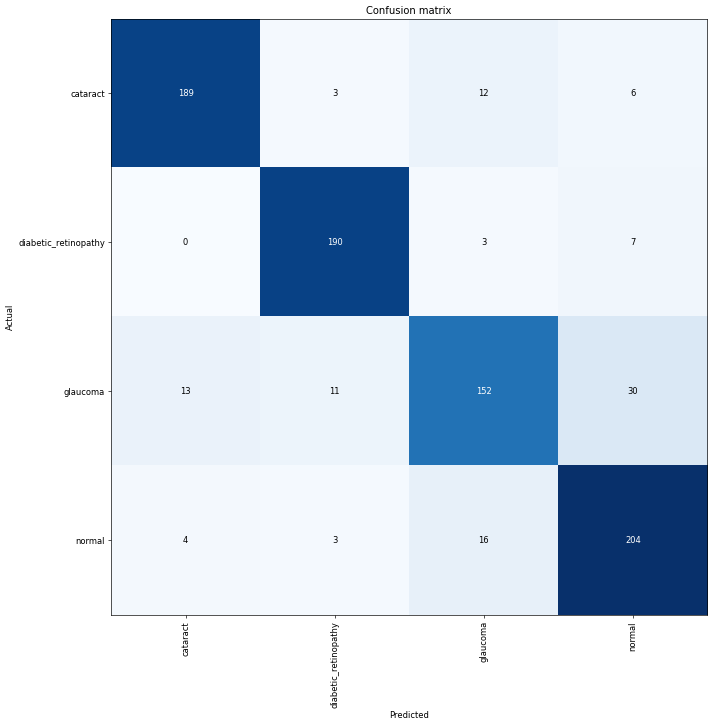

In [13]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

#Learning Rate Finder

SuggestedLRs(valley=1.2022644114040304e-05)

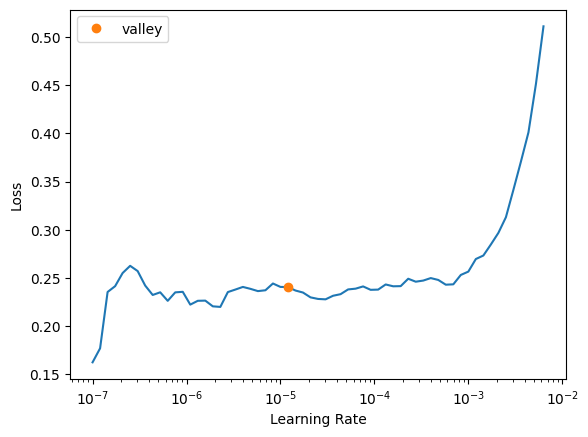

In [14]:
learn.lr_find()

#Transfer Learning

In [15]:
learn.freeze()
learn.fit_one_cycle(1, lr_max=9.12e-5)  # önce sadece son katman (F') eğitilir

learn.unfreeze()
learn.fit_one_cycle(4, lr_max=slice(1e-6, 9.12e-5))  # tüm katmanlar eğitilir

epoch,train_loss,valid_loss,accuracy,time
0,0.261922,0.328229,0.871886,00:55


epoch,train_loss,valid_loss,accuracy,time
0,0.242553,0.325746,0.870700,00:59
1,0.213919,0.306043,0.879004,00:56
2,0.195923,0.308937,0.883749,00:57
3,0.216726,0.309808,0.880190,00:57


#Mixed Precision Training

In [17]:
learn.to_fp16()  # B.6.3 - Reduce memory use and speed up training
learn.fit_one_cycle(5, lr_max=slice(1e-6, 9.12e-5))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,time
0,0.128908,0.301015,0.889680,00:55
1,0.140528,0.277579,0.908660,00:55
2,0.145036,0.282305,0.905101,00:54
3,0.127329,0.282843,0.909846,00:54
4,0.128731,0.287096,0.906287,00:54


In [18]:
learn.to_fp32()
learn.export('eye_disease_model.pkl')

In [19]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 32.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 80.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 7.1 MB/s eta 0:00:00


In [20]:
# app.py
import gradio as gr
from fastai.vision.all import *

# ✅ Load the exported model
learn = load_learner('eye_disease_model.pkl')

# ✅ Define prediction function
def classify_image(img):
    pred, pred_idx, probs = learn.predict(img)
    return {learn.dls.vocab[i]: float(probs[i]) for i in range(len(probs))}

# ✅ Set up Gradio interface
labels = learn.dls.vocab
demo = gr.Interface(
    fn=classify_image,
    inputs=gr.Image(type="pil"),
    outputs=gr.Label(num_top_classes=4),
    title="Eye Disease Classifier",
    description="Upload a retina image to detect Normal, Diabetic Retinopathy, Cataract or Glaucoma."
)

# ✅ Launch the app (on HuggingFace Spaces, no need to call launch())
demo.launch()

/usr/local/lib/python3.11/dist-packages/fastai/learner.py:455: UserWarning: load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.
If you only need to load model weights and optimizer state, use the safe `Learner.load` instead.
  warn("load_learner` uses Python's insecure pickle module, which can execute malicious arbitrary code when loading. Only load files you trust.\nIf you only need to load model weights and optimizer state, use the safe `Learner.load` instead.")


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://6ae8d5f9cc02104405.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
